In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#minmaxscaler
#standartscaler

Изучим данные

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пропуски отсутствуют

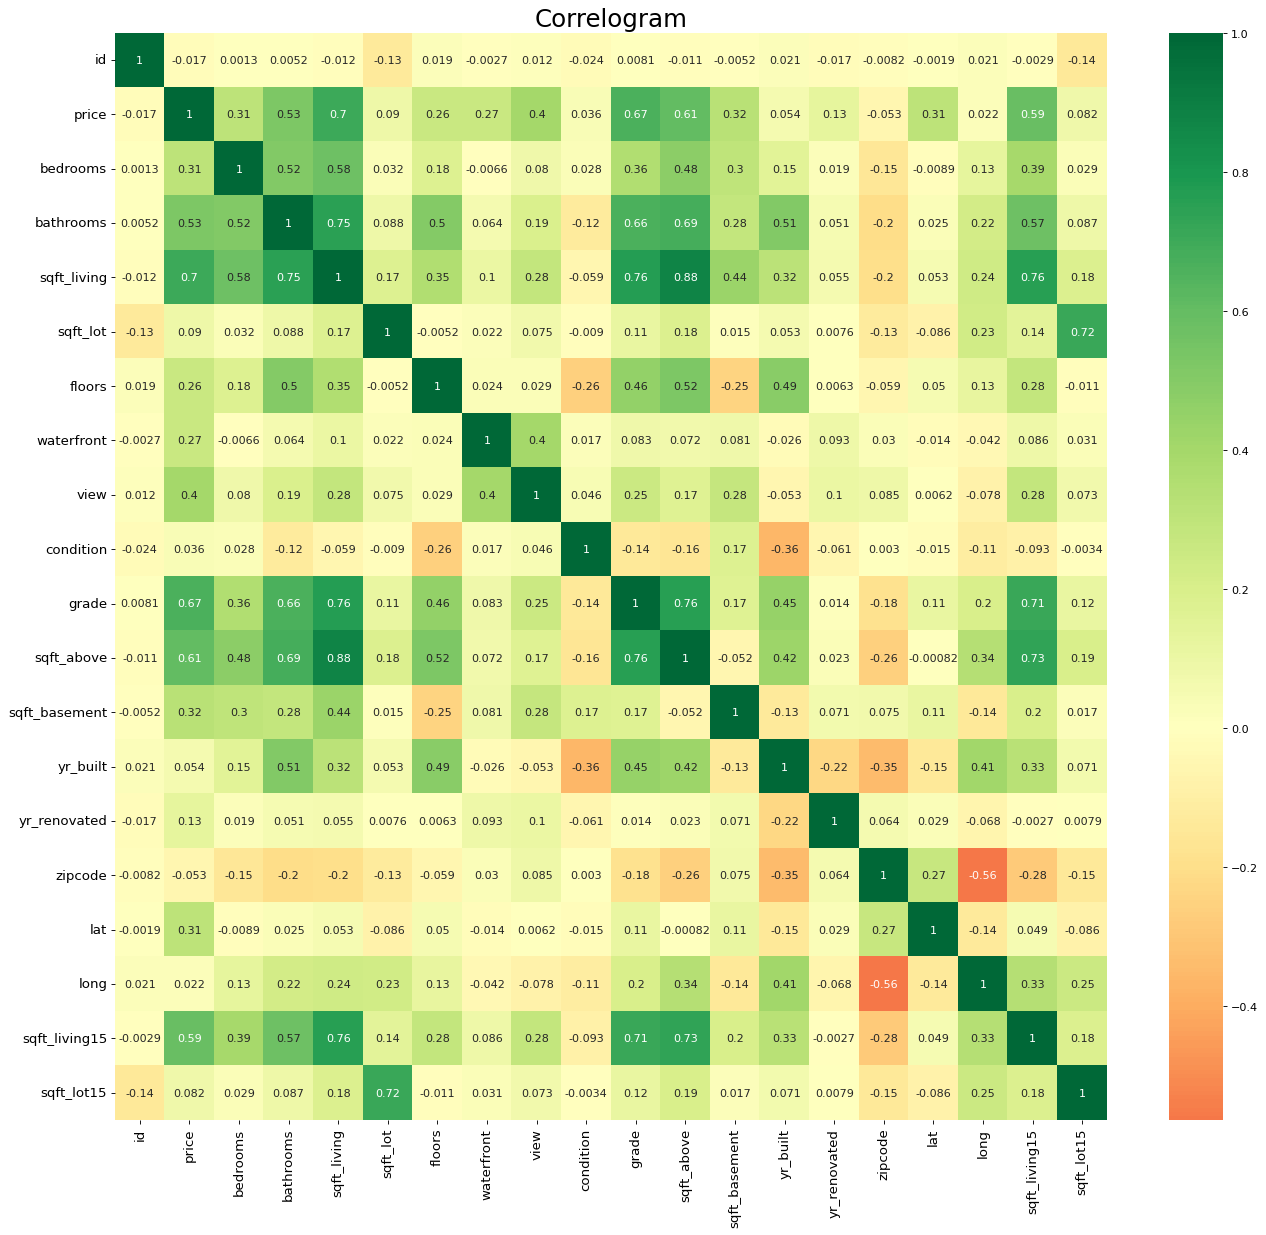

In [5]:
plt.figure(figsize=(20,18), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Создадим модель линейной регрессии

In [22]:
from sklearn.model_selection import train_test_split

In [53]:
y = df['price']
X = df.drop(columns = ['id', 'date', 'price', 'zipcode'])

In [67]:
Q = df.corr()[abs(df.corr().price) > 0.3]

In [70]:
Q.shape

(10, 20)

In [72]:
Q.index

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [73]:
X = df[Q.index]

In [41]:
# X = pd.get_dummies(X, columns=['yr_built', 'yr_renovated'])

In [74]:
X

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,0,8,1600,0,47.5345,1410


In [55]:
from sklearn.preprocessing import MinMaxScaler

trans = MinMaxScaler()
X2 = trans.fit_transform(X)

In [56]:
col = X.columns
X = pd.DataFrame(X2, columns = col)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.000000,0.874055,0.143688,0.194631,0.000986
21609,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.000000,0.570693,0.130399,0.246257,0.007523
21610,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.000000,0.705324,0.182724,0.106866,0.001558
21611,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.904348,0.000000,0.608975,0.373754,0.173980,0.000731


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
w0 = model.intercept_
w0

-4.656612873077393e-10

In [78]:
w1 = model.coef_
w1

array([ 1.00000000e+00, -4.39645643e-12,  2.99382832e-12, -2.40355864e-15,
       -2.54427245e-12,  3.99212249e-12, -5.75012626e-15,  3.34664159e-15,
       -2.87975606e-12, -1.18011156e-15])

In [79]:
eq = "Y = " + str(w0)
for i in range(X.shape[1]):
  eq += " + " + str(w1[i]) + "*X" + str(i)
print("Уравнение линейной регрессии: ", eq)

Уравнение линейной регрессии:  Y = -4.656612873077393e-10 + 1.000000000000001*X0 + -4.396456433558007e-12*X1 + 2.9938283177447025e-12*X2 + -2.4035586417405405e-15*X3 + -2.544272447226293e-12*X4 + 3.992122490210086e-12*X5 + -5.750126263316561e-15*X6 + 3.3466415949509163e-15*X7 + -2.879756055250972e-12*X8 + -1.180111557251861e-15*X9


In [83]:
y_pred = model.predict(X_test)

In [39]:
# y_pred[y_pred > 100000000]

267    1.177324e+16
dtype: float64

In [ ]:
# y_pred.drop()

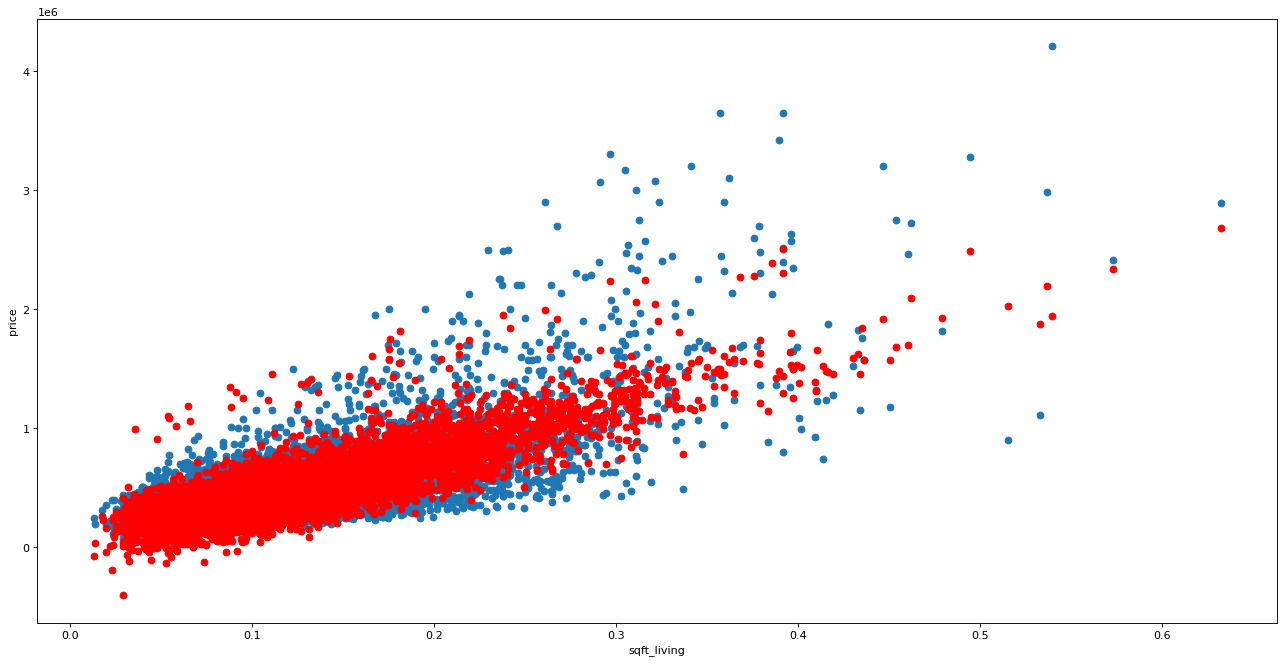

In [64]:
plt.figure(figsize=(20,10), dpi= 80)
plt.scatter(X0, y_test)
plt.scatter(X0, y_pred, color = 'red')
# plt.plot(X0, y_pred, color='red', linewidth=2)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

In [84]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.5382813268480734e-10
Mean Squared Error: 1.674547167208477e-19
R2 score: 1.0


In [87]:
mae = mean_absolute_error(y_test, y_pred)
print(f'{mae:.25f}')
mse = mean_squared_error(y_test, y_pred)
print(f'{mse:.25f}')

0.0000000002538281326848073
0.0000000000000000001674547


Коэффициент детерминации равен примерно 0,7; это можно считать довольно хорошим показателем, линейная регрессия достаточно точная

In [21]:
y_test.sum() / y_test.size

541649.3053670573

In [24]:
len(df['yr_built'].unique())

116

In [25]:
len(df['yr_renovated'].unique())

70